In [29]:
import numpy as np

In [ ]:
gpt = {
    "1": ([3, 1, 7], [1, 1, 7]),
    "2": ([7, 1, 3], [1, 1, 7]),
    "5": ([2, 3, 7], [1, 1, 7]),
    "16": ([1, 1, 7], [7, 1, 1]),
    "18": ([1, 1, 7], [7, 1, 1]),
    "55": ([6, 2, 4], [1, 3, 7]),
    "56": ([3, 3, 5], [5, 1, 1])
}
o3 = {
    "1": ([1, 4, 7], [1, 1, 7]),
    "2": ([7, 1, 4], [1, 1, 7]),
    "5": ([1, 4, 7], [1, 1, 7]),
    "16": ([1, 1, 7], [7, 1, 1]),
    "18": ([1, 1, 7], [7, 1, 1]),
    "55": ([7, 1, 1], [1, 4, 7]),
    "56": ([7, 7, 1], [7, 1, 1])
}
autotom = { # LMK; NML
    "1": ([0.22234267613140538, 0.3012087321584401, 0.4764485917101544], [0.17647058823529416, 0.4117647058823529, 0.4117647058823529],),
    "2": ([0.7457417691618865, 0.17798076158667944, 0.07627746925143407], [0.18193226270875024, 0.40903386864562485, 0.40903386864562485]),
    "5": ([0.14285714285714288, 0.14285714285714288, 0.7142857142857143], [0.18193226270875024, 0.40903386864562485, 0.40903386864562485]),
    "16": ([0.17310802989932908, 0.4618647064441284, 0.3650272636565425], [0.230308560446111, 0.3848457197769445, 0.3848457197769445]),
    "18": ([0.14285714285714288, 0.14285714285714288, 0.7142857142857143], [0.230308560446111, 0.3848457197769445, 0.3848457197769445]),
    "55": ([0.23962857882718774, 0.6659182759632616, 0.09445314520955063], [0.17647058823529416, 0.4117647058823529, 0.4117647058823529]),
    "56": ([0.42483828335501833, 0.4026132016514871, 0.17254851499349452], [0.17647058823529416, 0.4117647058823529, 0.4117647058823529])
}
human = { # original KLM, transformed into LMK; original LMN, transformed into NML
    "1": ([2.30643939393939, 5.50454545454545, 4.65265151515152], [0.214675850322803, 0.468446665314411, 0.316877484362787]), 
    "2": ([6.18712121212121,3.75530303030303, 2.51780303030303], [0.196834266232909, 0.343696163423766, 0.459469570343325]),
    "5": ([3.05879629629630, 3.15046296296296, 6.25740740740741], [0.338413151140581, 0.322002996251577, 0.339583852607842]),
    "16": ([4.67878787878788, 4.68636363636364, 4.16477272727273], [0.230078759563643, 0.385244360190713, 0.384676880245644]),
    "18": ([3.16666666666667, 3.19490740740741, 6.30555555555556], [0.377991748896567, 0.312823640950116, 0.309184610153317]),
    "55": ([3.13636363636364, 5.29318181818182, 2.31931818181818], [0.195652086313910, 0.437809479655484, 0.366538434030606]),
    "56": ([4.45909090909091, 4.47689393939394, 2.14431818181818], [0.234512758629884, 0.382450005710592, 0.383037235659524])
}

In [31]:
def normalize_data(a: list):
    a = np.array(a)
    return a / a.sum()

def transform_data(a: dict):
    des = []
    bel = []
    for k, v in a.items():
        des.append(normalize_data(v[0]))
        bel.append(normalize_data(v[1]))
    return np.array(des), np.array(bel)

def transform_data_wo_norm(a: dict):
    des = []
    bel = []
    for k, v in a.items():
        des.append(np.array(v[0]))
        bel.append(np.array(v[1]))
    return np.array(des), np.array(bel)

In [32]:
# desire_gpt, belief_gpt = transform_data(gpt)
# desire_autotom, belief_autotom = transform_data(autotom)
# desire_human, belief_human = transform_data(human)
desire_gpt, belief_gpt = transform_data_wo_norm(gpt)
desire_autotom, belief_autotom = transform_data_wo_norm(autotom)
desire_human, belief_human = transform_data_wo_norm(human)
desire_o3, belief_o3 = transform_data_wo_norm(o3)

In [33]:
print(desire_human)
print(desire_autotom)

[[2.30643939 5.50454545 4.65265152]
 [6.18712121 3.75530303 2.51780303]
 [3.0587963  3.15046296 6.25740741]
 [4.67878788 4.68636364 4.16477273]
 [3.16666667 3.19490741 6.30555556]
 [3.13636364 5.29318182 2.31931818]
 [4.45909091 4.47689394 2.14431818]]
[[0.22234268 0.30120873 0.47644859]
 [0.74574177 0.17798076 0.07627747]
 [0.14285714 0.14285714 0.71428571]
 [0.17310803 0.46186471 0.36502726]
 [0.14285714 0.14285714 0.71428571]
 [0.23962858 0.66591828 0.09445315]
 [0.42483828 0.4026132  0.17254851]]


In [34]:
# # Transform into the 7-point scale
# for i, des_aut in enumerate(desire_autotom):
#     desire_autotom[i] = des_aut * np.sum(desire_human[i])

# Transform 4o belief into distribution
print(belief_gpt)
belief_gpt = np.array([x / x.sum() for x in belief_gpt])
print(belief_gpt)
belief_o3 = np.array([x / x.sum() for x in belief_o3])
# print(desire_autotom)

[[1 1 7]
 [1 1 7]
 [1 1 7]
 [7 1 1]
 [7 1 1]
 [1 3 7]
 [5 1 1]]
[[0.11111111 0.11111111 0.77777778]
 [0.11111111 0.11111111 0.77777778]
 [0.11111111 0.11111111 0.77777778]
 [0.77777778 0.11111111 0.11111111]
 [0.77777778 0.11111111 0.11111111]
 [0.09090909 0.27272727 0.63636364]
 [0.71428571 0.14285714 0.14285714]]


In [35]:
from scipy.stats import pearsonr

print("Desire analysis")
r_autotom, p_autotom = pearsonr(desire_autotom.flatten(), desire_human.flatten())
r_gpt, p_gpt = pearsonr(desire_gpt.flatten(), desire_human.flatten())
r_o3, p_o3 = pearsonr(desire_o3.flatten(), desire_human.flatten())
print(f'AutoToM and human: r={r_autotom:.4f}, p={p_autotom:.4f}')
print(f'GPT and human: r={r_gpt:.4f}, p={p_gpt:.4f}')
print(f'o3-mini-high and human: r={r_o3:.4f}, p={p_o3:.4f}')

Desire analysis
AutoToM and human: r=0.8752, p=0.0000
GPT and human: r=0.3003, p=0.1859
o3-mini-high and human: r=0.5205, p=0.0156


In [36]:
print("Belief analysis")
r_autotom, p_autotom = pearsonr(belief_autotom.flatten(), belief_human.flatten())
r_gpt, p_gpt = pearsonr(belief_gpt.flatten(), belief_human.flatten())
r_o3, p_o3 = pearsonr(belief_o3.flatten(), belief_human.flatten())
print(f'AutoToM and human: r={r_autotom:.4f}, p={p_autotom:.4f}')
print(f'GPT and human: r={r_gpt:.4f}, p={p_gpt:.4f}')
print(f'o3-mini-high and human: r={r_o3:.4f}, p={p_o3:.4f}')

Belief analysis
AutoToM and human: r=0.7331, p=0.0002
GPT and human: r=0.0381, p=0.8697
o3-mini-high and human: r=0.0301, p=0.8971


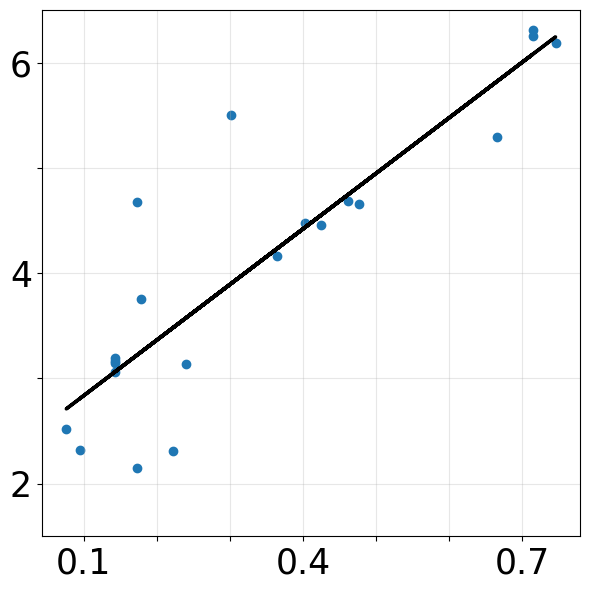

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(desire_autotom.flatten(), desire_human.flatten(), alpha=1.0)

x = desire_autotom.flatten()
y = desire_human.flatten()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='-', linewidth=2.5)

plt.ylim(1.5, 6.5)
plt.grid(True, alpha=0.3)

plt.xticks(np.arange(0.1, 0.8, 0.1), ['0.1', '', '', '0.4','', '', '0.7'], fontsize=25)
plt.yticks(np.arange(2, 7), ['2', '', '4', '', '6'], fontsize=25)

plt.tight_layout()

plt.savefig('desire_human_autotom.pdf', dpi=300)
plt.show()

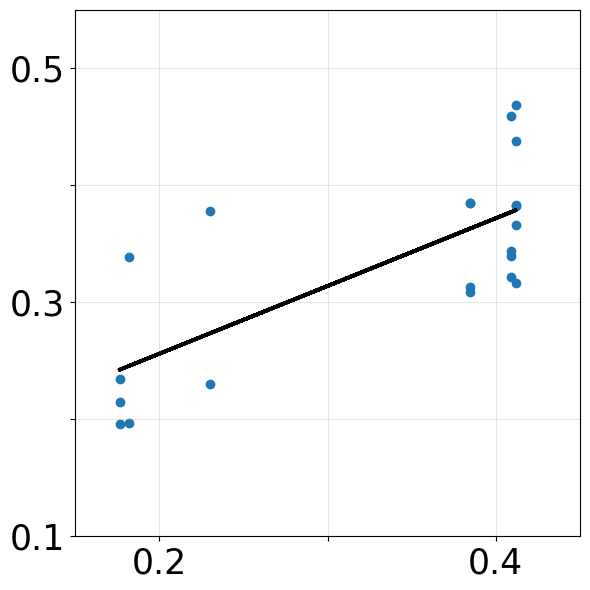

In [38]:
plt.figure(figsize=(6, 6))
plt.scatter(belief_autotom.flatten(), belief_human.flatten(), alpha=1.0)

x = belief_autotom.flatten()
y = belief_human.flatten()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='-', linewidth=2.5)

plt.ylim(0.1, 0.55)
plt.xlim(0.15, 0.45)
plt.grid(True, alpha=0.3)

plt.xticks(np.arange(0.2, 0.5, 0.1), ['0.2', '', '0.4'], fontsize=25)
plt.yticks(np.arange(0.1, 0.6, 0.1), ['0.1', '', '0.3', '', '0.5'], fontsize=25)
plt.tight_layout()

plt.savefig('belief_human_autotom.pdf', dpi=300)
plt.show()

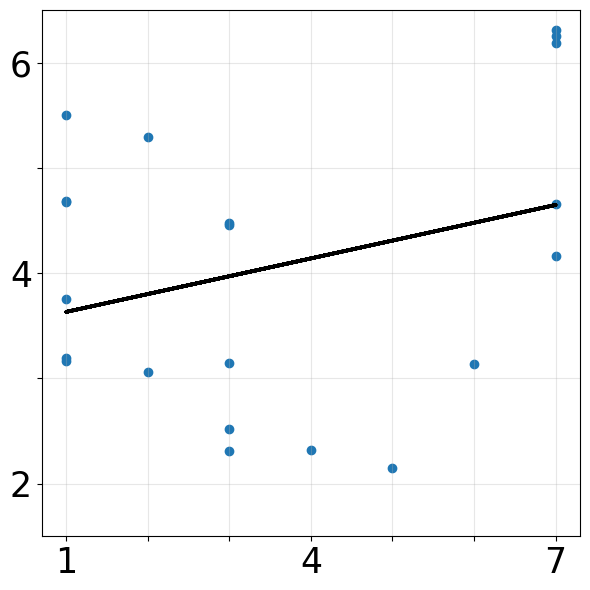

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(desire_gpt.flatten(), desire_human.flatten(), alpha=1.0)

x = desire_gpt.flatten()
y = desire_human.flatten()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='-', linewidth=2.5)

plt.grid(True, alpha=0.3)

plt.ylim(1.5, 6.5)
plt.xticks(np.arange(1, 8), ['1', '', '', '4', '', '', '7'], fontsize=25)
plt.yticks(np.arange(2, 7), ['2', '', '4', '', '6'], fontsize=25)
plt.tight_layout()

plt.savefig('desire_human_gpt.pdf', dpi=300)
plt.show()

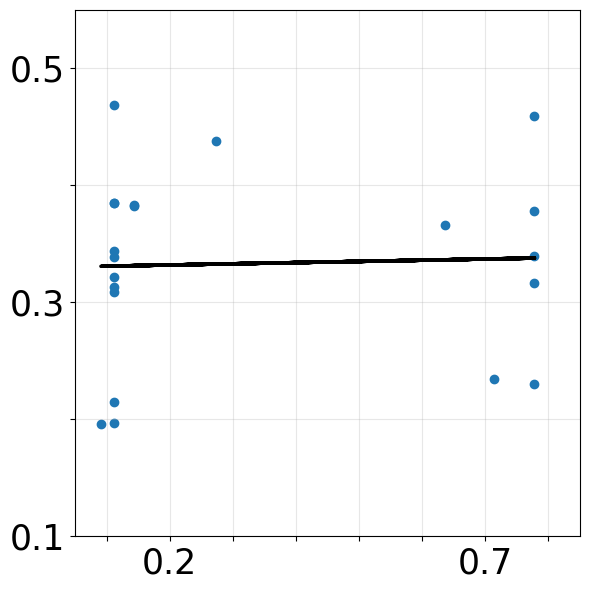

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(belief_gpt.flatten(), belief_human.flatten(), alpha=1.0)

x = belief_gpt.flatten()
y = belief_human.flatten()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='-', linewidth=2.5)

plt.ylim(0.1, 0.55)
plt.xlim(0.05, 0.85)
plt.grid(True, alpha=0.3)

plt.xticks(np.arange(0.1, 0.9, 0.1), ['', '0.2', '', '', '', '', '0.7', ''], fontsize=25)
plt.yticks(np.arange(0.1, 0.6, 0.1), ['0.1', '', '0.3', '', '0.5'], fontsize=25)
plt.tight_layout()

plt.savefig('belief_human_gpt.pdf', dpi=300)
plt.show()

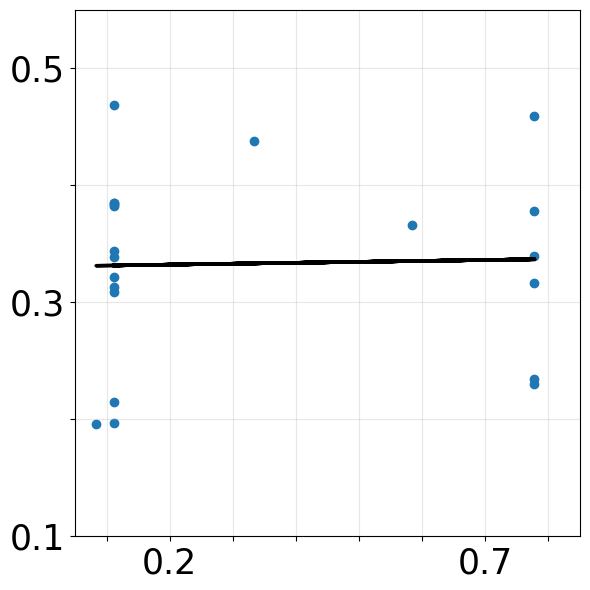

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(belief_o3.flatten(), belief_human.flatten(), alpha=1.0)

x = belief_o3.flatten()
y = belief_human.flatten()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='-', linewidth=2.5)

plt.ylim(0.1, 0.55)
plt.xlim(0.05, 0.85)
plt.grid(True, alpha=0.3)

plt.xticks(np.arange(0.1, 0.9, 0.1), ['', '0.2', '', '', '', '', '0.7', ''], fontsize=25)
plt.yticks(np.arange(0.1, 0.6, 0.1), ['0.1', '', '0.3', '', '0.5'], fontsize=25)
plt.tight_layout()

plt.savefig('belief_human_o3.pdf', dpi=300)
plt.show()

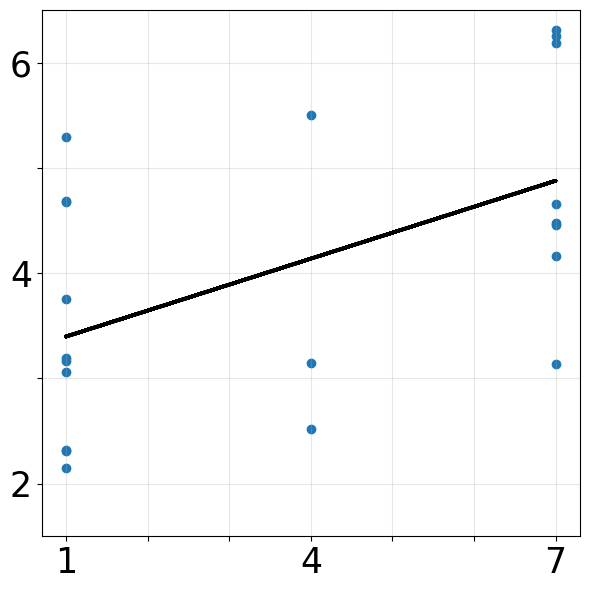

In [42]:
plt.figure(figsize=(6, 6))
plt.scatter(desire_o3.flatten(), desire_human.flatten(), alpha=1.0)

x = desire_o3.flatten()
y = desire_human.flatten()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='black', linestyle='-', linewidth=2.5)

plt.grid(True, alpha=0.3)

plt.ylim(1.5, 6.5)
plt.xticks(np.arange(1, 8), ['1', '', '', '4', '', '', '7'], fontsize=25)
plt.yticks(np.arange(2, 7), ['2', '', '4', '', '6'], fontsize=25)
plt.tight_layout()

plt.savefig('desire_human_o3.pdf', dpi=300)
plt.show()